In [92]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

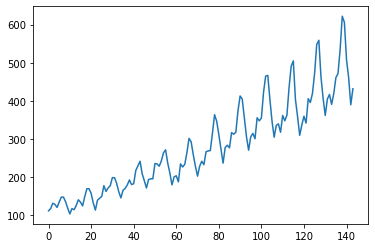

In [93]:
dataframe = read_csv("data/AirPassengers.csv", usecols=[1])
plt.plot(dataframe)

In [94]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32')

In [95]:
#normalize dataset
#converts the largest value to 1 and lowest above 0
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [96]:
#split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [97]:
#seq_size is the number of previous time steps to use as 
#input variables to predict the next time period

def to_sequences(dataset, seq_size=1):
    x = []
    y = []
    
    for i in range(len(dataset) - seq_size - 1):
        window = dataset[i:(i + seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x), np.array(y)


In [98]:
seq_size = 5 # number of time steps to look back
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test,seq_size)

In [99]:
#create and fit dense model

model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['acc'])
print(model.summary())


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                384       
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
None


In [100]:
#second model
#model = Sequential()
#model.add(Dense(8, input_dim=seq_size, activation='relu'))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam',metrics = [''])
#print(model.summary())

In [101]:
model.fit(trainX, trainY, validation_data=(testX, testY),
         verbose=2, epochs=100)

Epoch 1/100
3/3 - 0s - loss: 0.0038 - acc: 0.0112 - val_loss: 0.0217 - val_acc: 0.0233 - 418ms/epoch - 139ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0041 - acc: 0.0112 - val_loss: 0.0170 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0034 - acc: 0.0112 - val_loss: 0.0186 - val_acc: 0.0233 - 29ms/epoch - 10ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0033 - acc: 0.0112 - val_loss: 0.0160 - val_acc: 0.0233 - 29ms/epoch - 10ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0029 - acc: 0.0112 - val_loss: 0.0146 - val_acc: 0.0233 - 33ms/epoch - 11ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0029 - acc: 0.0112 - val_loss: 0.0138 - val_acc: 0.0233 - 29ms/epoch - 10ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0026 - acc: 0.0112 - val_loss: 0.0135 - val_acc: 0.0233 - 28ms/epoch - 9ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0025 - acc: 0.0112 - val_loss: 0.0134 - val_acc: 0.0233 - 29ms/epoch - 10ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0024 - acc: 0.0112 - val_loss: 0.0122 - val_acc: 0.0233 - 28ms/epoch - 9m

Epoch 74/100
3/3 - 0s - loss: 0.0011 - acc: 0.0112 - val_loss: 0.0047 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 75/100
3/3 - 0s - loss: 0.0010 - acc: 0.0112 - val_loss: 0.0051 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 76/100
3/3 - 0s - loss: 9.6428e-04 - acc: 0.0112 - val_loss: 0.0060 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 77/100
3/3 - 0s - loss: 9.6497e-04 - acc: 0.0112 - val_loss: 0.0048 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 78/100
3/3 - 0s - loss: 0.0010 - acc: 0.0112 - val_loss: 0.0048 - val_acc: 0.0233 - 31ms/epoch - 10ms/step
Epoch 79/100
3/3 - 0s - loss: 0.0010 - acc: 0.0112 - val_loss: 0.0060 - val_acc: 0.0233 - 26ms/epoch - 9ms/step
Epoch 80/100
3/3 - 0s - loss: 9.8089e-04 - acc: 0.0112 - val_loss: 0.0046 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 81/100
3/3 - 0s - loss: 9.8893e-04 - acc: 0.0112 - val_loss: 0.0049 - val_acc: 0.0233 - 27ms/epoch - 9ms/step
Epoch 82/100
3/3 - 0s - loss: 9.0888e-04 - acc: 0.0112 - val_loss: 0.0049 - val_acc: 0.

In [102]:
# Prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [103]:
# Estimate model performance by doing inverse transformation

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [104]:
#calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test score: %.2f RMSE' % (testScore))

Train score: 14.35 RMSE
Test score: 34.25 RMSE


In [105]:
#align the prediction on the x-axis with the origin
#shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [106]:
#shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size * 2)+1: len(dataset)-1, :] = testPredict

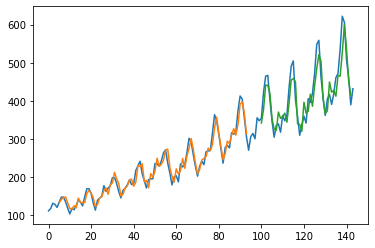

In [109]:
#plot baseline and prediction

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()